# Métodos Numéricos 2024

## Guía 3: 2024-04-23 - Interpolación y aproximación polinomial

In [12]:
using Plots
using LaTeXStrings

### Problema 1

1. Usando los puntos interpolantes $x_0 = 0$, $x_1=0.6$ y $x_2=0.9$, construya analíticamente los polinomios interpolantes de Lagrange de grado 1 y 2 que aproximen las funciones
  
    **a.** $f(x) = \ln (x+1)$
    
    **b.** $g(x) = \sqrt{x+1}$ 
    
    en $x=0.45$.

2. Encuentre los errores absolutos y relativos correspondientes.

3. En el rango dado $[x_0,x_2]$, grafique ambas funciones, sus polinomios interpolantes y correspondientes aproximaciones de Taylor de grado 2 entorno a $x_0$. Agregue al gráfico los puntos interpolantes $(x_i,f(x_i))$ (o $(x_i,g(x_i))$ según corresponda) usando símbolos en vez de curvas.

**Rta 1.1**

El polinomio interpolante de Lagrange sobre los puntos $(x_0,y_0)),...,(x_n,y_n))$ es
$$
P_n(x) = \sum_{i=0}^n y_iL_i(x)
$$
donde
$$
L_i(x) = \prod_{j=0,j\neq i}^n \frac{x-x_j}{x_i-x_j} = \frac{x-x_0}{x_i-x_0}...\frac{x-x_{i-1}}{x_i-x_{i-1}}\frac{x-x_{i+1}}{x_i-x_{i+1}}...\frac{x-x_n}{x_i-x_n}
$$
Luego,

In [13]:
function li(p,x,i)
    L=1.0
    for j in 1:length(x)
        if j!=i
            L *= (p-x[j])/(x[i]-x[j])
        end
    end
    return L
end

li (generic function with 1 method)

In [14]:
function lagrange(p,x,y)   
    @assert (p >= x[1]) && (p <= x[length(x)])
    P=0.0
    for i in 1:length(x)
        P += y[i]*li(p,x,i)
    end
    return P
end 

lagrange (generic function with 1 method)

In [15]:
x = [0.0,0.6,0.9]
y = [0.0,0.47,0.64]
p = 0.45

taylorln(x) = (1/1.45)*(x) - (1/(2+2(0.45)^2))*((x)^2)/2
f(x) = log(x+1)
lag(z) = lagrange(z,x,y)

lag (generic function with 1 method)

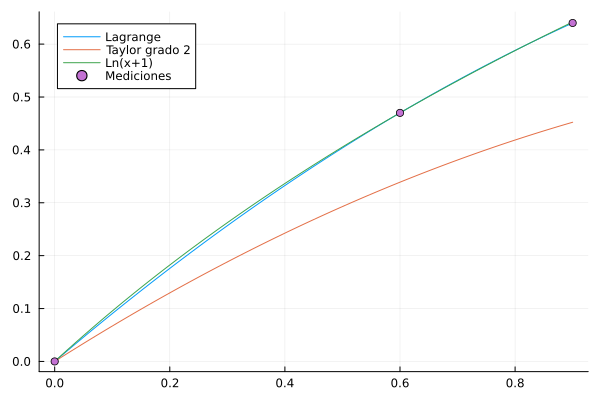

In [16]:
a = range(start=0, stop = 0.9, step=0.0045)
plot(a,lag.(a),label="Lagrange")
plot!(a,taylorln.(a),label="Taylor grado 2")
plot!(a,f.(a),label="Ln(x+1)")
scatter!(x,y,label="Mediciones")

No me di cuenta he hice directamente el algoritmo general para el pol de Lagrange (problema 2)


### Problema 2

1. Escriba una función que evalúe el **polinomio interpolante de Lagrange** $P$ en un punto $x$ con $x_0 < x < x_n$ siendo $(x_i,y_i)$ para $i=0,...,n$ los puntos a interpolar. La función debe tomar como argumentos de entrada: 

    1. el valor $x$, 
    2. un vector de valores $x_i$, 
    3. un vector  de valores $y_i$, y debe retornal el valor $P(x)$.

2. Para cada caso del **Problema 1**, realice un gráfico de $P(x)$ vs $x$ con una línea sólida generada con $N=200$ puntos equidistantes en el intérvalo $[x_0,x_n]$. Agrege a cada  gráfico la función interpolada utilizando una línea punteada sobre los mismos puntos, y los puntos de interpolación utilizando símbolos. **Ayuda:** no confundir los $N$ puntos usados para graficar las curvas, con los $n$ puntos interpolación $(x_i,y_i) = (x_i,f(x_i))$ con $i=0,1,2$ provistos en el **Problema 1**.

3. En otras figuras, gráfique la diferencia entre los polinomios y las funciones interpoladas.

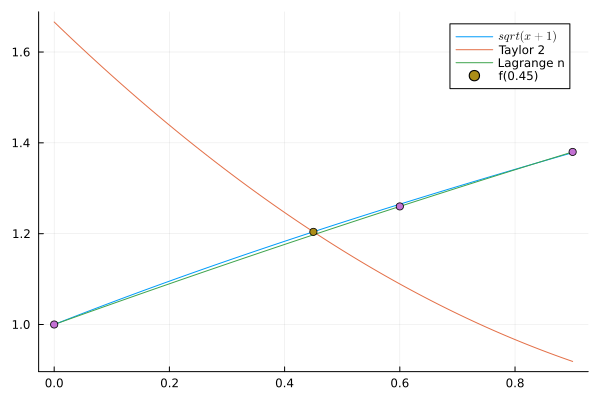

In [17]:
tayr(x) =1.204 - (1/sqrt(1.45))*(x-0.45) + (1/4*sqrt((1.45)^3))*(x-0.45)^2
g(x) = sqrt(x+1)
y1=[1,1.26,1.38]
lag2(z) = lagrange(z,x,y1)
plot(a,g.(a),label=L"sqrt(x+1)")
plot!(a,tayr.(a),label="Taylor 2")
plot!(a,lag2.(a),label="Lagrange n")
scatter!(x,y1,label="")
scatter!((0.45,1.204),label="f(0.45)")



Calculé mal el polinomiode Taylor, habría que revisarlo.

### Problema 3

Construya analíticamente el polinomio interpolante de Newton para las siguientes funciones. 
De una cota del error absoluto en el intervalo $[x_0,x_n]$.

1. La función
     $$f(x) = \exp (2x) \cos(3x)$$
   para $x_0=0$, $x_1=0.3$ y $x_2=0.6$.


2. La función 
    $$h(x) = \ln(x)$$
   para $x_0=1$, $x_1=1.1$, $x_2=1.3$ y $x_3=1.4$.

### Problema 4

1. Escriba una función que evalúe el **polinomio interpolante de Netwon** $P$ en un punto $x$ con $x_0 < x < x_n$ siendo $(x_i,y_i)$ para $i=0,...,n$ los puntos a interpolar. La función debe tomar como argumentos de entrada:
    1. el valor $x$, 
    2. un arreglo $v$ de valores $x_i$,
    3. un arreglo $w$ de valores $y_i$, y debe retornal el valor $P(x)$.

2. Grafique los polinomios interpolantes de Newton para las funciones del **problema 4** en $N=200$ puntos equidistantes en el intervalo $[x_0,x_n]$ correspondiente. Incluya en el grafico las curvas de las funciones y, con símbolos, los puntos de interpolación.

3. Repita los incisos 1. y 2. pero usando puntos de interpolación determinados por $n=80$ valores equidistantes de $x_i$ en $[0,0.6]$ para $f$ y en $[1,1.4]$ para $g$.

4. Repita el inciso 3. pero usando `BigFloat` en vez de `Float64`.

5. Interprete lo observado.

In [18]:
"""
    diferenciasnew(vec_x::Vector, vec_f::Vector)

Devuelve un vector con las direnencias divididas del polinomio interpolante de newton a partir de los puntos `vec_x` y sus imagenes correspondientes `vec_f`

"""
function diferenciasnew(vec_x,vec_f)
    #sort!(vec_x)
    
    #Vec_x es el vector (X0,X1,...,Xn) 
    #vec_f es el vecto que almacena (f(X0),f(X1),...,f(Xn))

    #j es el loop que corresponde a cada tanda de coeficientes de grado 1,2,...,n
    for j in 2:length(vec_f)
        #Se calcula los coeficientes de grado j, reemplazando el valor vec_f[i] por la diferencia dividida f[i]-f[i-1]
        for i in length(vec_f):-1:j
            vec_f[i] = (vec_f[i] - vec_f[i-1])/(vec_x[i] - vec_x[i-j+1])
        end

    end
    #Se devuelven los valores de los coeficientes del polinomio de Newton
    return(vec_f)
end
#=Evalua el polinomio interpolante de Newton en x
function polnew(x,vec_x,vec_f)
    coef = diferenciasnew(vec_x,vec_f) 
    #Primer término de la sumatoria del polinomio de Newton correspondiente al polinomio de grado 0
    s = coef[1] #coef[1] = f(Xo)

    #Computamos la sumatoria de los coeficientes a partir de grado 2
    for j in 2:length(coef) 
        p = 1 
        #Calculamos cuanto sería el término (x - x0)(x - x1) * ... * (x - xj-1)  para hacer el producto con el coeficiente de grado j
        for i in 1:j-1
            p *= (x-vec_x[i])
        end
        #Calculamos el término i de la sumatoria como Pi(x) = Pi-1(x) + f[X0,X1,...,Xi]*(x-x0)*...(x-xi)
        s = s + coef[j]*p
    end
    return s #Devolvemos el valor del polinomio interpolante de Newton en X
end
=#

diferenciasnew

In [19]:
"""
    polnew(x,vec_x,coef)

Calcular el polinomio interpolante de Newton en el punto `x` a partir de un vector de valores `vec_x` y vector de coeficientes `coef`

"""
function polnew(x,vec_x,coef)  
    s = coef[1]    
    for j in 2:length(coef) 
        p = 1         
        for i in 1:j-1
            p *= (x-vec_x[i])
        end      
        s = s + coef[j]*p
    end
    return s 
end

polnew

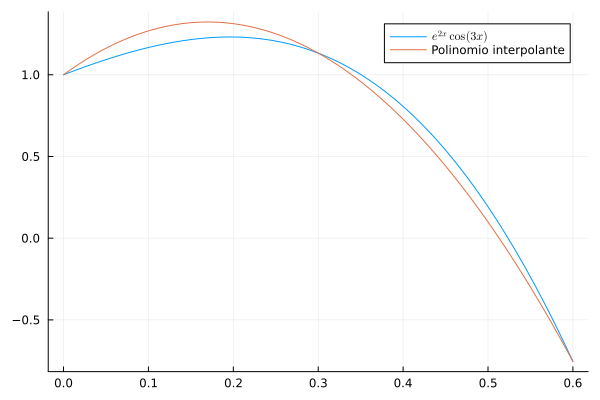

In [21]:
using LaTeXStrings
using Plots

h(x) = exp(2*x)*cos(3*x)
hxvec = [0,0.3,0.6]
hyvec= h.(hxvec)


coefih = diferenciasnew(hxvec,hyvec) #Coeficientes de la función g(x)
hint(x) = polnew(x,hxvec,coefih) #Polinomio interpolante de g(x)

x=range(start=0,stop=0.6,length=200)
plot(x,h,label=L"$e^{2x}\cos(3x)$")
plot!(x,hint,label="Polinomio interpolante")
#Agregar el scatter!(hxvec,hyvec) literalmente se rompe todo, no tiene sentido

In [3]:
#Log
logxvec = [1.0,1.1,1.3,1.4]
logyvec= log.(logxvec)

coefilog = diferenciasnew(logxvec,logyvec)

lnint(x)=polnew(x,logxvec,coefilog)

m=range(start=1,stop=1.4,length=200)
plot(m,log,label="Ln(x)")
plot!(m,lnint,label="Polinomio interpolante")
#scatter!(logxvec,logyvec,label="Puntos interpolantes") ASIMISMO ACÁ POR ALGUNA RAZÓN SE ROMPE TODO CON EL SCATTER DIOS

LoadError: UndefVarError: `diferenciasnew` not defined

### Problema 5 

#### Error  de la interpolación polinomial para puntos equiespaciados

Usando el teorema dado en el teórico, demuestre el siguiente corolario.

**Corolario:** Sea $f \in C_{[a,b]}^{(n+1)}$  tal que $\exists M>0 / |f^{(n+1)}(x) |< M \;\forall \,x\in [a,b]$ (i.e. su $n+1$-ésima derivada es acotada en $[a,b]$). Sea $x_i=a + ih \;; i=0,\cdots,n$ donde $ h=(b-a)/n$. Sea $P_n$ es el polinomio de grado $n$ interpolante a $f$ en los puntos $x_i$ (i.e. $P_n(x_i)=f(x_i)\;,i=0,\cdots ,n$). Entonces, $\forall\;x\in [a,b]$ se tiene
$$
\left| f(x) - P_n(x)\right | \leq \frac{M}{4 (n+1)}\;\left(\frac{b-a}{n}\right)^{n+1}
$$

In [4]:
function biseccion(f,a,b,ϵx=10^-10,ϵf=10^-10,maxi=100)

    ci=0
    ri=ϵx+1
    xp=a + (b-a)/2
    i=1
    estimaciones = Array{Any}(undef, maxi,5)
    intervalos = Array{Float64}(undef,maxi,4)
    
     for i in 1:maxi
            
        if f(xp)*f(a)<0
            b=xp
        else
            a=xp
        end
        
        xp = a + (b-a)/2
        ci=abs(b-a)/2
        ri=ci/abs(xp)
        estimaciones[i,:] = [false xp f(xp) ci ri] 
        
        if abs(f(xp))<ϵf && ri<ϵx
            println("El algoritmo convergió")
            estimaciones[i,:] = [true xp f(xp) ci ri] 
            return xp, estimaciones[1:i,:]            
            break
        end
        
        if i == maxi
            println("El algoritmo no convergió")
            return xp, estimaciones
        end
        
    end        
end

biseccion (generic function with 4 methods)

In [5]:
display(biseccion(x->x^2-2,1,3,10^-10,10^-10,10)[2])

El algoritmo no convergió


10×5 Matrix{Any}:
 0.0  1.5       0.25         0.5          0.333333
 0.0  1.25     -0.4375       0.25         0.2
 0.0  1.375    -0.109375     0.125        0.0909091
 0.0  1.4375    0.0664062    0.0625       0.0434783
 0.0  1.40625  -0.0224609    0.03125      0.0222222
 0.0  1.42188   0.0217285    0.015625     0.010989
 0.0  1.41406  -0.000427246  0.0078125    0.00552486
 0.0  1.41797   0.0106354    0.00390625   0.00275482
 0.0  1.41602   0.00510025   0.00195312   0.00137931
 0.0  1.41504   0.00233555   0.000976562  0.000690131

### Problema 6

Se desea aproximar $\cos(x)$ en el intervalo $[0,1]$ con un error absoluto menor a $1\times 10^{-7}$ para todo $x \in [0,1]$. 

1. Usando el teorema del error de la interpolación polinomial, estime el número $n$ de puntos de interpolación que son necesarios para conseguir el máximo error absoluto mencionado.

2. Grafique el error absoluto en el intervalo en cuestión para tres casos particulares de $\{x_i\}$: 
    1. puntos equidistantes $x_i=i/n$, 
    2. $n$ puntos distribuidos al azar en el intervalo $[0,1]$, y 
    3. puntos distribuidos heterogéneamente según la fórmula $x_i=1/i$ para $i=1,2,...,n$.

In [6]:
"""
    filtro(a,vec)
Dado un vector `v`, y un valor `a`:   Devuelve un vector igual a `v` excepto por la entradas donde v = a
"""
function filtro(a,vec)
    n=length(vec)
    filt = Array{Float64}(undef,n)
    
    offset = 0
    for i in n
        j = i-offset
        
        if vec[i] != a
            filt[j]=vec[i]
        else
            println("Indice ",i," eliminado")
            offset +=1
        end
                 
    end
    return filt[1:n-offset-1]
end

filtro

In [7]:
"""
    acot(a,v)
Dado un vector `v` y un valor `a`, devuelve un vector igual a `v`, pero acotado inferiormente por a (reemplaza los valores de v menor a `a` con `a`)
"""
function acot(a::Float64,v::Vector{Float64})
    res = Array{Float64}(undef,length(v))
    for i in length(v)
        if v[i] < a
            v[i] = a
        end
    end
    return res
end

acot

In [8]:
"""
    check(a,v)
Prints el índice donde los elementos del vector `v` son igual a `a`
"""
function check(a,v)
    for i in 1:length(v)
       if v[i] == a
            println("Indice ",i," es ",a)
        end  
    end
end

check

Asi vemos que necesitamos 6 puntos en el intervalo [0,1] (era usando el metodo de la biseccion, pero bueno)

### 2)

In [9]:
x=0:0.01:1

A = 0:1/6:1
fA = cos.(A)

diferenciasA = diferenciasnew(A,fA)
interpolA(x) = polnew(x,A,diferenciasA)
difA(x) = abs(cos(x)-interpolA(x))

datos = filter(!iszero,difA.(x))

plot(datos,yscale=:log10,label=L"$x_i=i/n$")

LoadError: UndefVarError: `diferenciasnew` not defined

In [10]:
A=rand(6) 
fA=cos.(A)

diferenciasA2 = diferenciasnew(A,fA)
interpolA2(x) = polnew(x,A,diferenciasA2)
difA2(x) = abs(cos(x)-interpolA2(x))

datos2 = filter(!iszero,difA2.(x))

plot(datos2,yscale=:log10,label=L"$X_i = rng$")


LoadError: UndefVarError: `diferenciasnew` not defined

In [11]:
A = [1,1/2,1/3,1/4,1/5,1/6]
fA = cos.(A)

diferenciasA3 = diferenciasnew(A,fA)
interpolA3(x) = polnew(x,A,diferenciasA3)
difA3(x) = abs(cos(x)-interpolA3(x))

datos2 = filter(!iszero,difA3.(x))

plot(datos2,yscale=:log10,label=L"$X_i = 1/i  ,  i ∈ [[1,6]]$")

LoadError: UndefVarError: `diferenciasnew` not defined

## Ejercicios Complementarios

### Problema C.1

Considere la función definida por $f(x) = \frac{1}{1 + 25 x^2}$.

1. Grafique la función $f$ en el intervalo $[-1,1]$.

Luego, para cada valor de $n\in \{5, 10, 20\}$:

2. Calcule la interpolación de $f$ por el **método de Lagrange** usando $n+1$ valores equidistantes de $x$ en el intervalo mencionado.

3. Añada al gráfico una curva del polinomio interpolante evaluandolo en 200 puntos equidistantes en los rangos $x=[-1,1]$ e $y=[-1.5,1.5]$.

4. Calcule el error máximo para cada caso e incluya estos datos de errores máximos en el gráfico.

**Nota:** En este problema se observa el llamado *fenómeno de Runge*, en el que la interpolación por polinomios usando puntos equiespaciados da resultados divergentes.

5. ¿Por qué no hay contradicción con el teorema de aproximación de Weierstrass?

6. En vez de puntos equiespaciados, pruebe usando el espaciamiento de Chebyshev dado por $x_i = -\cos(\pi (i-1)/n)$, para $i=1,2,...,n+1$. ¿Disminuye significativamente el error en este caso?

### Problema C.2

Considere el siguiente polinomio:
$$
p(x) = -10 + 5 x - 12 x^2  + 6 x^3  - 2 x^4  + x^5 \ ,
$$

1. Grafíquelo y observe que posee una única raíz real positiva.

2. Calcule a mano su derivada y grafíquela.

3. Evalúe el polinomio y su derivada utilizando el algoritmo de Horner de la guía 2. Grafique nuevamente comparando con lo graficado en los incisos 2. y 3. para verificar que dan lo mismo.

4. Encuentre la raíz del polinomo utilizando el método de Newton-Raphson. Para ello, elija el valor inicial $p_1$ sacando ventaja de los teoremas que acotan la región del espacio complejo donde se encuentran las raíces.